<h1 align='center' style='color:red'>Name: Muhammad Sohaib</h1>
<h1 align='center' style='color:red'>Roll No: 22F-BSAI-40</h1>
<h1 align='center' style='color:red'>Department: BS-Artificail Intelligence</h1>
<h1 align='center' style='color:red'>Course: Programming of AI</h1>
<h1 align='center' style='color:red'>Submitted to: Sir Hamza Farooqui</h1>


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from scipy.stats import ttest_1samp, chi2_contingency
from scipy.integrate import odeint, solve_ivp

# Q1: Outlier Detection and Feature Reduction

In [20]:
df = pd.read_csv('patient_data.csv')  
df.head()

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High


## Feature Reduction

In [21]:
selector = VarianceThreshold(threshold=0.0)
df_reduced = pd.DataFrame(selector.fit_transform(df.select_dtypes(include='number')),
                          columns=df.select_dtypes(include='number').columns[selector.get_support()])

## Detect & Remove Outliers from CholesterolLevel

In [22]:
Q1 = df_reduced['CholesterolLevel'].quantile(0.25)
Q3 = df_reduced['CholesterolLevel'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_reduced = df_reduced[(df_reduced['CholesterolLevel'] >= lower_bound) & 
                        (df_reduced['CholesterolLevel'] <= upper_bound)]

## Replace Missing Values

In [23]:
df_cleaned = df_reduced.fillna(df_reduced.median(numeric_only=True))
df_cleaned = df_cleaned.fillna(df_reduced.mode().iloc[0])  
df_cleaned.head()

,PatientID,Age,CholesterolLevel,BloodPressure
0,1.0,37.0,193.4,129.4
1,2.0,45.0,210.7,107.1
2,3.0,63.0,244.3,103.9
3,4.0,53.0,184.5,127.2
4,5.0,29.0,175.7,116.6


# Q2: Data Visualization

## Box Plot: BloodPressure by RiskCategory

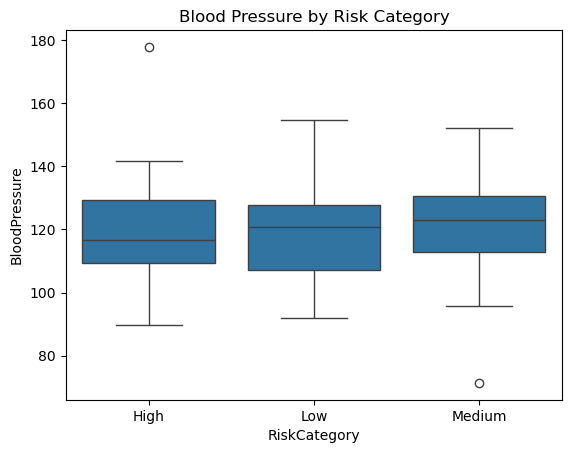

In [24]:
sns.boxplot(x='RiskCategory', y='BloodPressure', data=df)
plt.title("Blood Pressure by Risk Category")
plt.show()

## Count Plot: Patients in each RiskCategory per Region

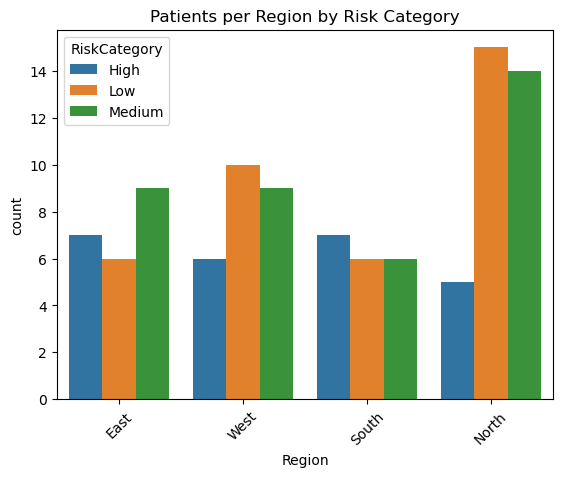

In [25]:
sns.countplot(x='Region', hue='RiskCategory', data=df)
plt.title("Patients per Region by Risk Category")
plt.xticks(rotation=45)
plt.show()

# Q3: Statistical Hypothesis Testing

## Part 1: Is average Cholesterol Level significantly different from 200 mg/dL?

In [26]:
from scipy import stats

sample = df['CholesterolLevel'].sample(20, random_state=1)
t_stat, p_value = stats.ttest_1samp(sample, 200)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Average CholesterolLevel is significantly different from 200.")
else:
    print("Fail to reject H₀: No significant difference from 200.")

T-Statistic: 1.169892069971572
P-Value: 0.25651089244102654
Fail to reject H₀: No significant difference from 200.


## Part 2: Is there a significant relationship between Region and RiskCategory?

In [27]:
contingency = pd.crosstab(df['Region'], df['RiskCategory'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("Chi-square Statistic:", chi2)
print("P-Value:", p)

if p < 0.05:
    print("Reject H₀: There is a significant relationship between Region and RiskCategory.")
else:
    print("Fail to reject H₀: No significant relationship.")

Chi-square Statistic: 4.537654289304933
P-Value: 0.6043217060679176
Fail to reject H₀: No significant relationship.


# Q4: Modeling a Health System with ODE

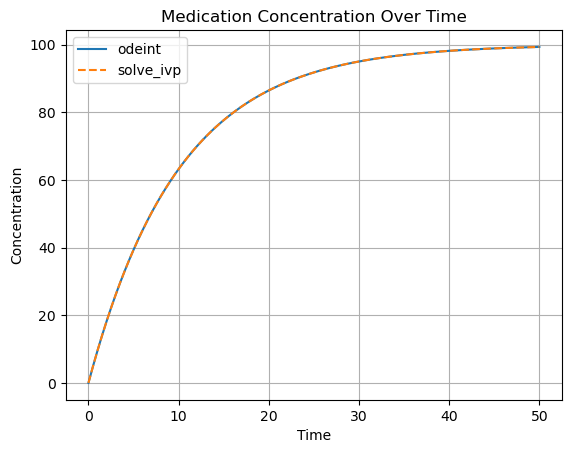

In [28]:
# Parameters
k = 0.1
D = 100

# ODE Function
def model(C, t):
    return k * (D - C)

t = np.linspace(0, 50, 200)
C0 = 0

# Using odeint
C_odeint = odeint(model, C0, t)

# Using solve_ivp
def model_ivp(t, C):
    return k * (D - C)

sol = solve_ivp(model_ivp, [0, 50], [0], t_eval=t)

# Plotting
plt.plot(t, C_odeint, label='odeint')
plt.plot(sol.t, sol.y[0], '--', label='solve_ivp')
plt.title("Medication Concentration Over Time")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.grid(True)
plt.show()

Both solvers produce similar results for this simple ODE, but solve_ivp offers more flexibility and control, while odeint is simpler and often faster.